In [59]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("./data/income_dataset.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [40]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [41]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [42]:
df = df.dropna()

In [43]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K'],
      dtype='object')

<Axes: >

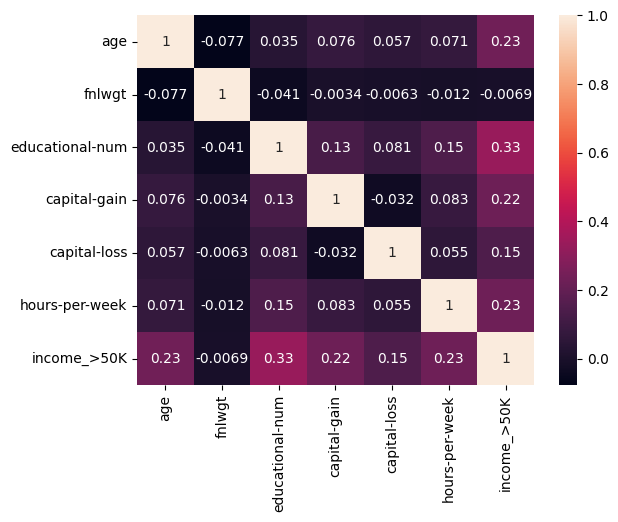

In [44]:
sns.heatmap(numerical_df.corr(), annot = True)

In [45]:
df['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [46]:
# Let's convert the marital-status categories to just single and married:

df['marital-status'] = df['marital-status'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married'], 'single')

df['marital-status'] = df['marital-status'].replace(['Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse'], 'married')

In [47]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,single,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,single,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,married,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,single,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [48]:
# Let's encode the categorical columns
l_encoder = LabelEncoder()

In [49]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df = categorical_df.apply(l_encoder.fit_transform)
categorical_df.head(10)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,3,10,1,3,1,4,1,38
1,3,2,1,7,3,4,1,38
2,3,9,0,3,0,4,1,38
3,6,5,0,13,0,4,1,38
4,6,15,1,7,1,2,1,38
5,6,11,1,0,3,4,1,38
6,3,6,0,6,5,4,0,38
7,5,9,0,11,0,4,1,23
8,3,11,1,5,1,4,1,38
9,3,11,0,3,0,4,1,38


In [50]:
df = df.drop(categorical_df.columns, axis=1)
df = pd.concat([df, categorical_df], axis=1)
df.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,67,366425,16,99999,0,60,1,3,10,1,3,1,4,1,38
1,17,244602,8,0,0,15,0,3,2,1,7,3,4,1,38
2,31,174201,13,0,0,40,1,3,9,0,3,0,4,1,38
3,58,110199,4,0,0,40,0,6,5,0,13,0,4,1,38
4,25,149248,10,0,0,40,0,6,15,1,7,1,2,1,38
5,59,105363,9,0,0,40,0,6,11,1,0,3,4,1,38
6,70,216390,5,2653,0,40,0,3,6,0,6,5,4,0,38
7,35,361888,13,0,0,60,0,5,9,0,11,0,4,1,23
8,28,74784,9,0,0,50,0,3,11,1,5,1,4,1,38
9,28,118089,9,4386,0,45,1,3,11,0,3,0,4,1,38


<Axes: >

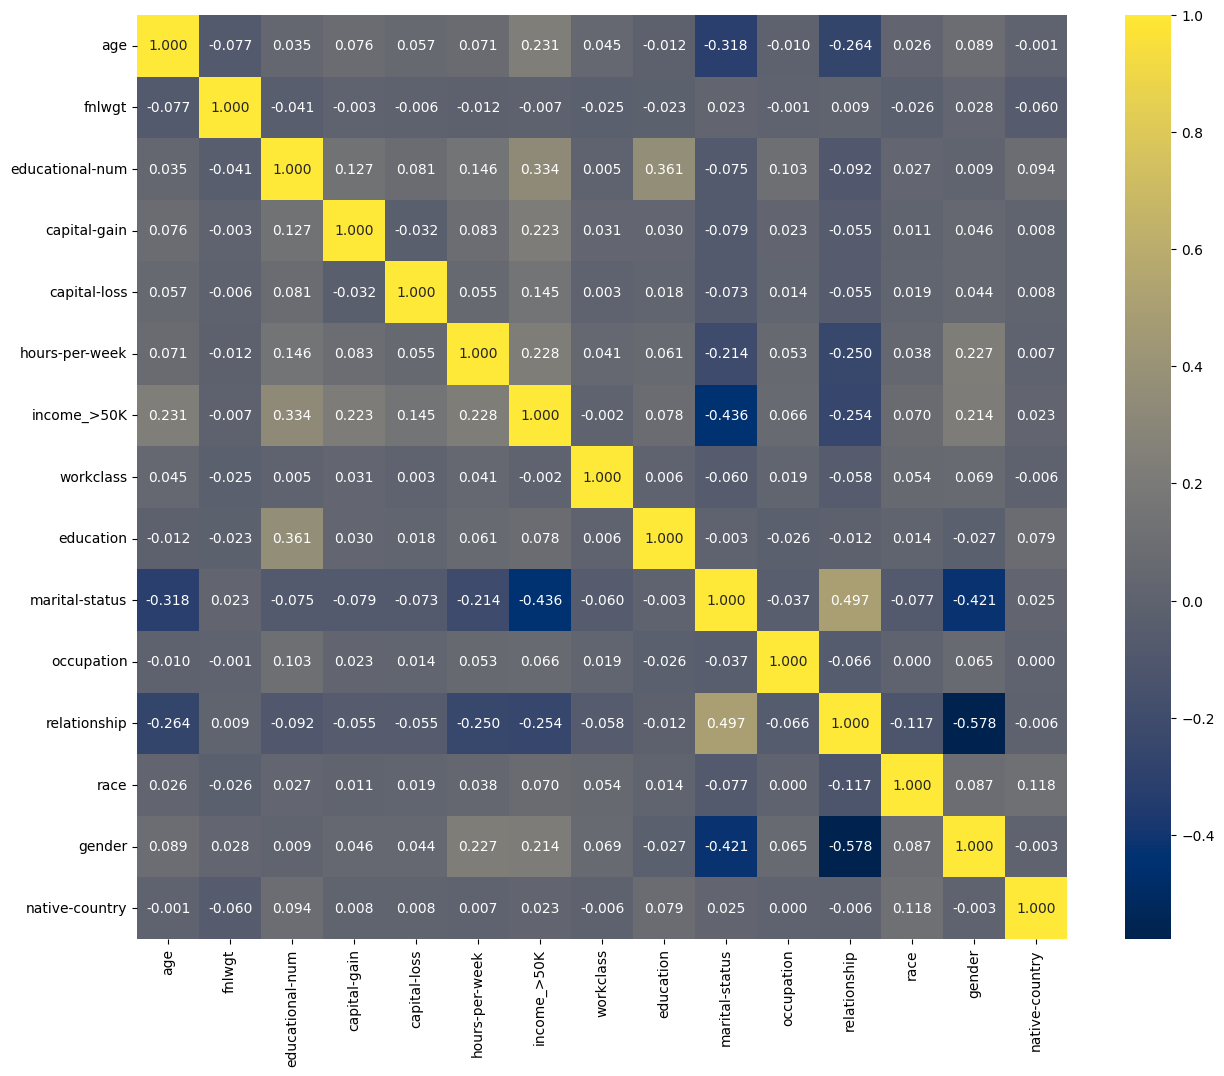

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='cividis')

In [52]:
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

In [53]:
# Let's split up the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

In [55]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train) # model training

RandomForestClassifier(random_state=42)

In [57]:
# Let's make prediction
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [58]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.854
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6656
           1       0.74      0.61      0.67      2136

    accuracy                           0.85      8792
   macro avg       0.81      0.77      0.79      8792
weighted avg       0.85      0.85      0.85      8792



In [61]:
model_directory = 'saved_models'
model_filename = 'income_rf_model.joblib'
model_path = os.path.join(model_directory, model_filename)

# Create the directory if it doesn't exist
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

joblib.dump(rf_classifier, model_path)
print(f"Model saved to {model_path}")

# Save the Scaler
scaler_filename = 'scaler.joblib'
scaler_path = os.path.join(model_directory, scaler_filename)
joblib.dump(s_scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

Model saved to saved_models/income_rf_model.joblib
Scaler saved to saved_models/scaler.joblib
